In [35]:
import pandas as pd

## Methods

### Prophet
[Prophet](https://doi.org/10.7287/peerj.preprints.3190v2) is an open-source Python and R library for time-series data forecasting developed by Facebook. The library decomposed time-series data into three main model components, trend, seasonality, and holidays.

    $$ y(t) = g(t) + s(t) + h(t) + \epsilon_t $$

Where $g(t)$ is the trend function, $s(t)$ represents seasonality, and $h(t)$ represents the effects of holidays. The error term $\epsilon_t$ represents the idiosyncratic changes that the model can not accommodate.



### NeuralProphet
[NeuralPropht](https://doi.org/10.48550/arXiv.2111.15397), inspired by the Facebook Prophet, implemented a hybrid model to fuse the classic time series components by the Prophet package with neural network modules ([AR-Net](https://doi.org/10.48550/arXiv.1911.12436)) to enable the capability of fitting non-linear dynamics. The model is composed of six main component modules.

$$ \hat{y}_t = T(t) + S(t) + E(t) + F(t) + A(t) + L(t) $$

where $T(t)$ is the trend at time $t$,  $S(t)$ is seasonal effects,  $E(t)$ is event and holiday effects,  $F(t)$ is regression effects for future-known variables at time $t$,  $A(t)$ is auto-regression effects at time $t$ based on past observations. $L(t)$ is regression effects for lagged observations of exogenous variables at time $t$.


### Metrics
MAPE

## Results

In [36]:
mape_p = pd.read_csv("checkpoints/test_prophet_mape.csv", index_col=0)
mape_np = pd.read_csv("checkpoints/np_mape_results_f24.csv", index_col=0)
mape_np_f1 = pd.read_csv("checkpoints/np_mape_results.csv", index_col=1)
mape = pd.merge(mape_p, mape_np, on="zone")[["zone", "mape_test", "mape"]]
mape = pd.merge(mape, mape_np_f1, on="zone")[["zone", "mape_test", "mape_x", "mape_y"]]

mape.columns = ["zone", "mape_p", "mape_np", "mape_np_f1"]
mape = mape.set_index("zone")
mape.sort_index()

,mape_p,mape_np,mape_np_f1
zone,,,
AE,0.126363,0.036915,0.018117
AEP,0.073588,0.020996,0.008136
AP,0.078434,0.021817,0.008944
ATSI,0.073919,0.022771,0.007961
BC,0.103926,0.025203,0.009379
CE,0.088734,0.026490,0.007550
DAY,0.085985,0.028105,0.008725
DEOK,0.088954,0.031684,0.012393
DOM,0.094767,0.019292,0.007718


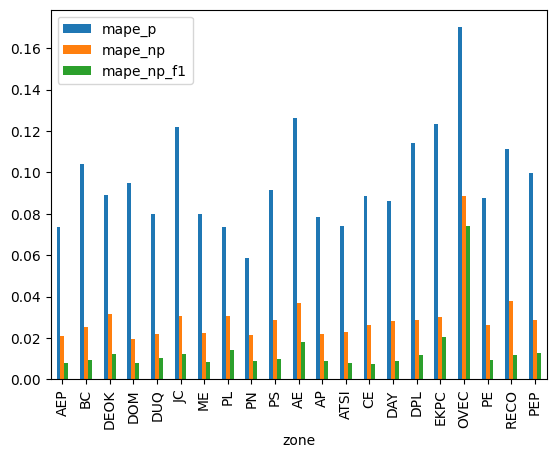

In [37]:
ax = mape.plot.bar()

Here, the MAPE values are calculated at the test timepoints based on the forcasting results from the trained Prophet and NeuralProphet models. The results show the NeuralProphet performed significantly better than Prophet model.

### Todo: learning curves, forcasting future

## Reference
Prophet: https://doi.org/10.7287/peerj.preprints

NeuralPropht: https://doi.org/10.48550/arXiv.2111.15397

AR-Net: https://doi.org/10.48550/arXiv.1911.12436